<a href="https://colab.research.google.com/github/blennyblex/OpensourceProject/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install fbprophet

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month']= pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


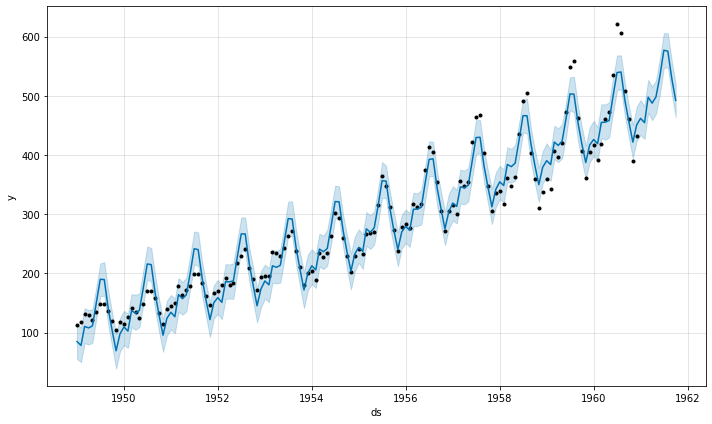

In [ ]:
model = Prophet()
# model = Prophet(interval_width= 0.95, yearly_seasonality=True) giving it a confidence interval of 95%, by default, it is 80%, yearly_seasonality depends on your data
model.fit(df)

#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast)
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,55.279647,114.305296,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,50.089848,108.378491,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,82.153712,140.980279,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.837069,137.921398,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,82.564764,139.150983,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1961-05-31,502.558318,503.336978,564.240712,502.379155,502.715933,31.434601,31.434601,31.434601,31.434601,31.434601,31.434601,0.0,0.0,0.0,533.992919
150,1961-06-30,505.571811,547.489446,605.845632,505.337814,505.781195,71.490542,71.490542,71.490542,71.490542,71.490542,71.490542,0.0,0.0,0.0,577.062353
151,1961-07-31,508.685754,547.816472,605.989584,508.400381,508.955234,66.809872,66.809872,66.809872,66.809872,66.809872,66.809872,0.0,0.0,0.0,575.495626
152,1961-08-31,511.799697,502.891157,558.501742,511.451686,512.125165,17.269540,17.269540,17.269540,17.269540,17.269540,17.269540,0.0,0.0,0.0,529.069236


In [ ]:
# Note:
# The black dots are the actual datapoints,
#  the thick blue lines are the predictions, 
#  the light blues are the lower and upper boundary

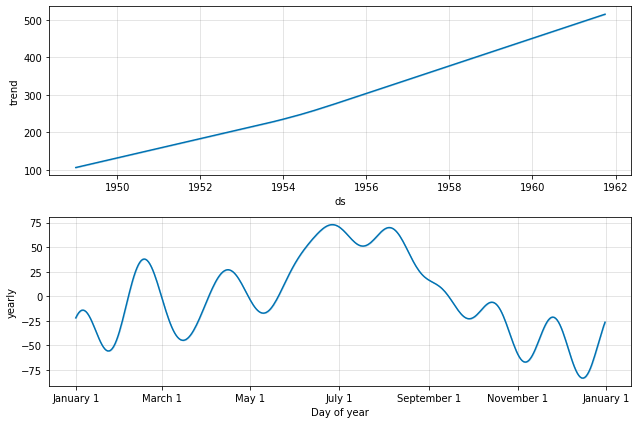

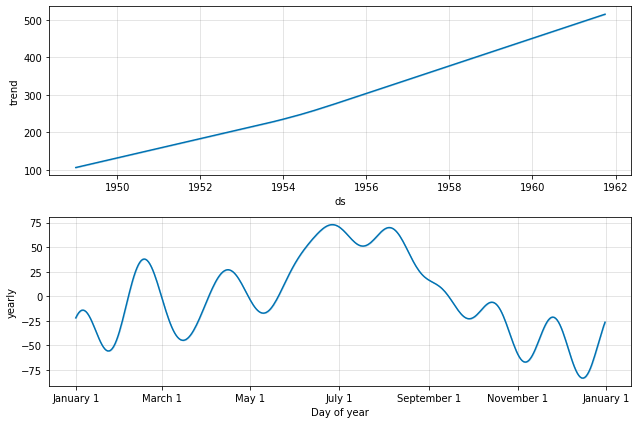

In [ ]:
# visualize each components (trends, monthly)
model.plot_components(forecast)

In [ ]:
model.params

{'beta': array([[ 0.00724577, -0.07534109,  0.02759604,  0.01830153,  0.00118025,
         -0.01343922,  0.00626601, -0.00239768,  0.00224678, -0.01070237,
         -0.02286251, -0.00340451,  0.00757487,  0.01636497,  0.0160825 ,
          0.01189631,  0.01526208,  0.00925248,  0.00287963,  0.01291007]]),
 'delta': array([[-2.67226778e-10,  1.53136041e-09,  2.19196827e-09,
          1.64517902e-08,  1.61802412e-08,  2.05722402e-09,
          1.63361653e-08,  5.94644579e-09,  2.26677328e-08,
          1.50883137e-06,  2.33522763e-06,  2.78793897e-02,
          4.21768875e-02,  5.45488568e-02,  5.12898785e-02,
          3.11191009e-02,  5.29744773e-03,  7.76034034e-08,
         -3.99573448e-09, -1.15805152e-08, -4.30104888e-09,
          1.91872916e-08,  1.11894597e-06,  7.33752043e-06,
          3.75512357e-07]]),
 'k': array([[0.49050099]]),
 'm': array([[0.1715884]]),
 'sigma_obs': array([[0.03611776]]),
 'trend': array([[0.1715884 , 0.17508232, 0.17823811, 0.18173203, 0.18511324,
   

In [ ]:
# cross validation

In [ ]:
# for measuring forecast error by comparing the predicted valyes with the actual values
# initial: the size of the initial training period
# period: the spacing between cutoff dates
# horizon: the forecast horzon(dates minus cutoff)
# by default, the initial training period is set to three times the horizon, and the cutoffs are made every half a horizon
# cutoff is how far into the future the forecast was

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df.shape

(144, 2)

In [ ]:
365*3

1095

In [ ]:
cv = cross_validation(model, initial = "1095 days", period = "180 days", horizon = "365 days")

INFO:fbprophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


In [ ]:
cv1 = cross_validation(model, initial = "144 days", period = "180 days", horizon="365 days")

INFO:fbprophet:Making 22 forecasts with cutoffs between 1949-07-27 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
 cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-02-01,176.418549,173.050675,180.118643,180,1952-01-13
1,1952-03-01,190.922735,187.402444,194.218922,193,1952-01-13
2,1952-04-01,199.998319,196.796049,203.398318,181,1952-01-13
3,1952-05-01,183.896474,180.162610,187.625155,183,1952-01-13
4,1952-06-01,208.184847,204.638557,211.763160,218,1952-01-13


In [ ]:
cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1949-08-01,1650.508772,1650.508772,1650.508772,148,1949-07-27
1,1949-09-01,2287.744680,2287.744679,2287.744680,136,1949-07-27
2,1949-10-01,-126.223737,-126.223738,-126.223736,119,1949-07-27
3,1949-11-01,658.141476,658.141475,658.141478,104,1949-07-27
4,1949-12-01,-990.047745,-990.047747,-990.047743,118,1949-07-27


In [ ]:
# performance metrics 

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_pm = performance_metrics(cv)
df_pm1 = performance_metrics(cv1)

In [ ]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1183.572611,34.403090,27.582475,0.081440,0.085545,0.300
1,42 days,1266.031591,35.581338,29.414793,0.085617,0.088420,0.250
2,46 days,1160.583871,34.067343,28.276413,0.083493,0.088420,0.250
3,47 days,1309.610276,36.188538,30.987011,0.089271,0.090918,0.200
4,48 days,1123.832675,33.523614,28.041339,0.082426,0.088420,0.250
...,...,...,...,...,...,...,...
153,359 days,826.276631,28.745028,22.604399,0.069416,0.061258,0.275
154,360 days,830.174134,28.812743,22.918286,0.070380,0.061258,0.250
155,362 days,929.131458,30.481658,24.265580,0.069287,0.061258,0.250
156,364 days,900.211216,30.003520,23.092411,0.066087,0.049586,0.300


In [ ]:
df_pm1

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,268935.429851,518.589847,178.071346,1.182024,0.090918,0.153846
1,40 days,268938.608436,518.592912,178.295457,1.182749,0.090918,0.153846
2,41 days,225472.676276,474.839632,148.975860,0.988800,0.090918,0.153846
3,42 days,181550.938446,426.087947,117.665101,0.770992,0.088420,0.134615
4,46 days,181081.518906,425.536742,115.680538,0.749199,0.088420,0.115385
...,...,...,...,...,...,...,...
189,359 days,19529.853772,139.749253,46.450328,0.223985,0.061258,0.269231
190,360 days,19532.851852,139.759979,46.691780,0.224727,0.061258,0.250000
191,362 days,19629.177146,140.104165,48.492448,0.227848,0.071572,0.230769
192,364 days,19608.397085,140.029986,47.621004,0.223493,0.061258,0.269231


In [ ]:
# visualizing performance metrics

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

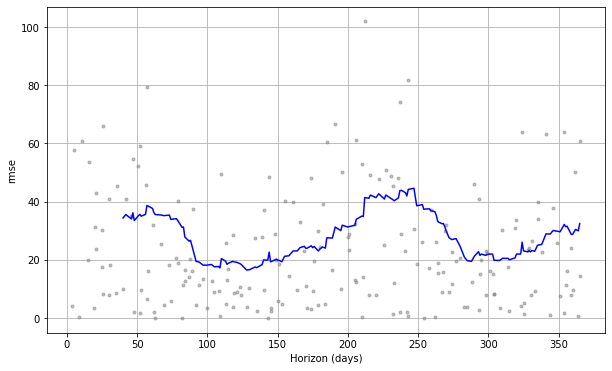

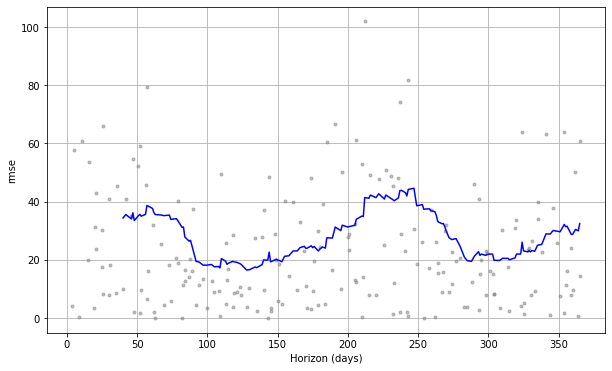

In [ ]:
plot_cross_validation_metric(cv, metric="rmse")

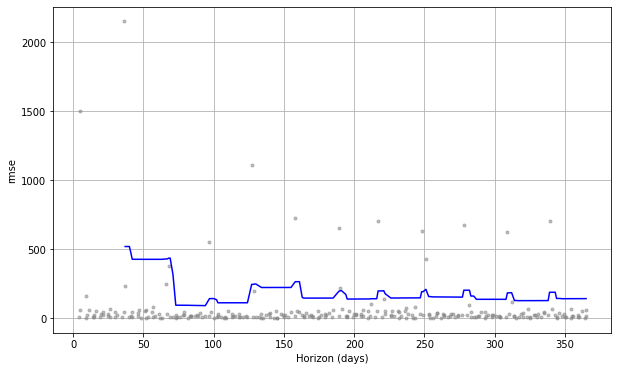

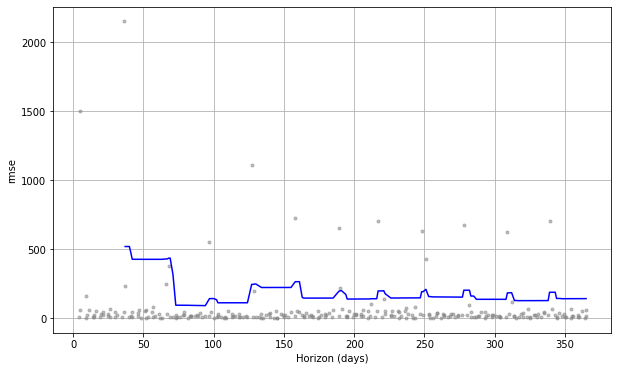

In [ ]:
plot_cross_validation_metric(cv1, metric= "rmse")